In [ ]:
import pandas as pd

path = "kc_house_data.csv"

df = pd.read_csv(path)

display(df.head())



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
import pandas as pd

# đọc dữ liệu (để file cùng thư mục)
df = pd.read_csv("kc_house_data.csv")

# drop những cột không cần
df = df.drop(columns=[c for c in ["id","date"] if c in df.columns], errors="ignore")

# chọn cột số, tách y=price và X là phần còn lại, rồi drop hàng thiếu
num_cols = df.select_dtypes("number").columns
assert "price" in num_cols, "Thiếu cột price"
features = [c for c in num_cols if c != "price"]

df2 = df[["price"] + features].dropna()
y = df2["price"]
X = df2[features]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_tmp, y_train, y_tmp = train_test_split(
    X, y, test_size=0.30, random_state=42, shuffle=True
)

X_val, X_test, y_val, y_test = train_test_split(
    X_tmp, y_tmp, test_size=0.50, random_state=42, shuffle=True
)

print("Train:", X_train.shape, y_train.shape)
print("Val  :", X_val.shape,   y_val.shape)
print("Test :", X_test.shape,  y_test.shape)


Train: (15129, 18) (15129,)
Val  : (3242, 18) (3242,)
Test : (3242, 18) (3242,)


In [6]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)   # fit trên train
X_val_sc   = scaler.transform(X_val)         # chỉ transform
X_test_sc  = scaler.transform(X_test)

# kiểm tra nhanh: train đã ~ N(0,1)?
m = np.mean(X_train_sc, axis=0)[:5]
s = np.std (X_train_sc, axis=0)[:5]
print("Mean 5 feature đầu (≈0):", np.round(m, 3))
print("Std  5 feature đầu (≈1):", np.round(s, 3))
print("Shapes:", X_train_sc.shape, X_val_sc.shape, X_test_sc.shape)

# giữ lại scaler để dùng lúc suy luận (transform dữ liệu mới)


Mean 5 feature đầu (≈0): [ 0.  0.  0. -0. -0.]
Std  5 feature đầu (≈1): [1. 1. 1. 1. 1.]
Shapes: (15129, 18) (3242, 18) (3242, 18)


Epoch 1/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 419699294208.0000 - mae: 537637.3750 - val_loss: 425312223232.0000 - val_mae: 541326.1250
Epoch 2/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 419673538560.0000 - mae: 537620.5000 - val_loss: 425258483712.0000 - val_mae: 541292.5625
Epoch 3/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 419572416512.0000 - mae: 537558.9375 - val_loss: 425086386176.0000 - val_mae: 541190.6875
Epoch 4/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 419311124480.0000 - mae: 537404.8125 - val_loss: 424703033344.0000 - val_mae: 540968.2500
Epoch 5/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 418800795648.0000 - mae: 537107.5000 - val_loss: 424021786624.0000 - val_mae: 540576.6875
Epoch 6/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 417959346176.0000 - mae: 536620.6875 - val_loss: 422962528256.0000 - val_mae: 539970.4375
Epoch 7/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 416711606272.0000 - mae: 535899.7500 - val_loss

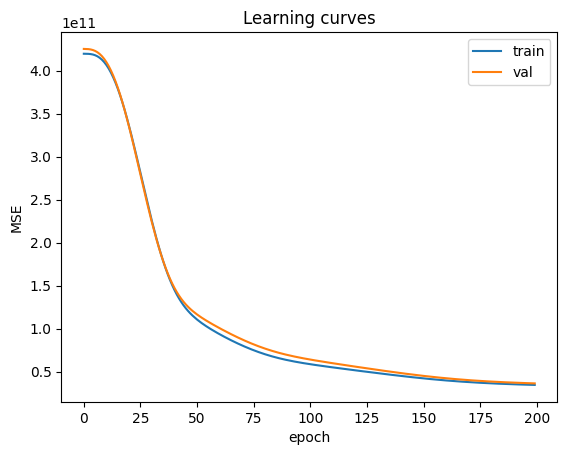

In [ ]:
# cho hồi quy giá nhà (Keras)
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

tf.random.set_seed(42)
np.random.seed(42)

# 1) Kiến trúc ANN đơn giản
n_features = X_train_sc.shape[1]
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(n_features,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # linear output cho hồi quy
])

# 2) Compile với MSE, theo dõi MAE
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
              loss='mse',
              metrics=['mae'])

# 3) EarlyStopping để tránh overfit
es = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=20, restore_best_weights=True
)

# 4) Huấn luyện
hist = model.fit(
    X_train_sc, y_train.values,
    validation_data=(X_val_sc, y_val.values),
    epochs=200, batch_size=256,
    callbacks=[es], verbose=1
)

# 5) Đánh giá nhanh trên validation
val_mse, val_mae = model.evaluate(X_val_sc, y_val.values, verbose=0)
print("Val MSE:", round(val_mse, 2))
print("Val MAE:", round(val_mae, 2))

# 6) (tuỳ chọn) vẽ learning curve MSE
plt.figure()
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='val')
plt.xlabel('epoch'); plt.ylabel('MSE'); plt.legend(); plt.title('Learning curves')
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# 1) Dự đoán trên test
y_pred = model.predict(X_test_sc).ravel()

# 2) Chỉ số đánh giá
mse  = mean_squared_error(y_test, y_pred)
mae  = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2   = r2_score(y_test, y_pred)

print(f"Test MSE : {mse:,.2f}")
print(f"Test RMSE: {rmse:,.2f}")
print(f"Test MAE : {mae:,.2f}")
print(f"Test R^2 : {r2:.4f}")

# 3) Xem thử vài dự đoán
out = np.c_[y_test.values[:5], y_pred[:5]]
print("\n[Giá thực, Giá dự đoán] (5 mẫu đầu):")
for yt, yp in out:
    print(f"{yt:,.0f}  |  {yp:,.0f}")


102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Test MSE : 40,599,575,311.23
Test RMSE: 201,493.36
Test MAE : 123,797.32
Test R^2 : 0.7404

[Giá thực, Giá dự đoán] (5 mẫu đầu):
346,950  |  361,403
3,850,000  |  2,794,249
492,000  |  415,438
528,000  |  337,244
340,000  |  270,290
